In [1]:
#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)

#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

#defining model
model=Sequential()

#adding convolution layer
model.add(Conv2D(32,(3,3),activation= "relu",input_shape=(28,28,1)))

#adding pooling layer
model.add(MaxPool2D(2,2))

#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation="relu"))

#adding output layer
model.add(Dense(10,activation= "softmax" ))

#compiling the model
model.compile(loss= "sparse_categorical_crossentropy",optimizer= "adam",metrics=["accuracy"])
#fitting the model
model.fit(X_train,y_train,epochs=10)


2023-11-01 04:44:19.158414: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1579 - accuracy: 0.9537
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0571 - accuracy: 0.9825
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0362 - accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0241 - accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0176 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0131 - accuracy: 0.9959
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0091 - accuracy: 0.9972
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0067 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/st

In [35]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
# import numpy as np
import matplotlib.pyplot as plt
import torch.utils.data.dataloader




In [36]:
mean_gray = 0.1307
stddev_gray= 0.3081
transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean_gray),(stddev_gray))])


In [37]:
#normalize
train_dataset= datasets.MNIST(root='./data', train = True, transform=transforms, download=True)
test_dataset= datasets.MNIST(root='./data', train = False, transform=transforms, download=True)


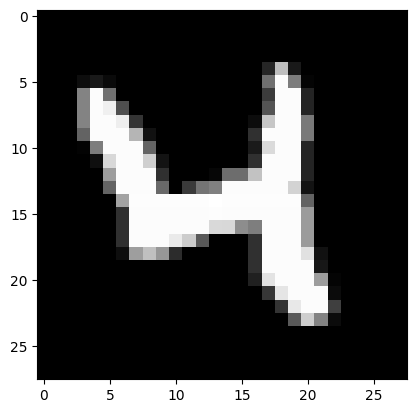

In [38]:
#visualize(denormalise)

random_img=train_dataset[20][0].numpy() * stddev_gray + mean_gray
plt.imshow(random_img.reshape(28,28),cmap='gray')



In [43]:
label = train_dataset[20][1]  # Getting the label from the dataset
print(label)

batch_size = 100
epochs = 10

# Creating DataLoaders for training and testing
train_load = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_load = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


4


In [44]:
print('There are {} images in the training set'.format(len(train_dataset)))
print('There are {} images in the test set'.format(len(test_dataset)))
print('There are {} batches in the train loader'.format(len(train_load)))
print('There are {} batches in the testloader'.format(len(test_load)))

There are 60000 images in the training set
There are 10000 images in the test set
There are 600 batches in the train loader
There are 100 batches in the testloader


In [52]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self) 
        self.cnn1= nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.batchnorm1= nn.BatchNorm2d
        self.relu= nn.ReLU()
        self.maxpool= nn.MaxPool2d(kernel_size=2)
        self.maxpool = nn.MaxPool2d(Kernel_size = 2)
        self.cnn2 = nn.Conv2d(in_channels = 8, out_channels = 32, kernel_size = 5, stride = 1, padding = 2)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(1568,600)    #fully connected layer
        self.dropout = nn.dropout(0.5)
        self.fc2 = nn.Linear(600,10)      #fully connected layer
    def forward(self, x):
        out = self.cnn1(x)
        out = self.batchnorm1(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.cnn2(out)
        out = self.batchnorm2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = out.view(-1,1568)  #1568=7X7X32
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

In [53]:
model = CNN()
CUDA = torch.cuda.is_available()
if CUDA:
    model = model.cuda()    
loss_fn = nn.CrossEntropyLoss()        
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0

SyntaxError: incomplete input (3895314227.py, line 6)